In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

### Tutorial C2: Plotting

A crucial component of conveying what a model has learned is creating compelling visuals that display key points. Largely, `tangermeme` does not do that. However, it does/will implement some key basic functions that can help researchers during the iterative process that is research. Accordingly, the goal for these plots is not to be the most aesthetically pleasing (though if you have thoughts on how to improve the looks, please submit a PR) but rather to implement core functionality that can be built upon.

#### Attribution Logo

When applying sequence-based machine learning methods to regions to try to understand them better, it is common to calculate attributions to highlight the motifs/nucleotides that are driving activity. These plots are usually sequence logos where the height of the characters in the plot corresponds to whatever the attribution returned by the attribution method is. 

In [2]:
from tangermeme.utils import random_one_hot
from tangermeme.ersatz import substitute

X = random_one_hot((1, 4, 2000), random_state=0)
X = substitute(X, "CTCAGTGATG")

In [3]:
import torch
from model import Beluga

model = Beluga()
model.load_state_dict(torch.load("deepsea.beluga.torch"))

<All keys matched successfully>

In [4]:
from tangermeme.ism import saturation_mutagenesis

attr_ref, attr_ism = saturation_mutagenesis(model, X)

X_attr = attr_ism - attr_ref[:, None, None]
X_attr = (X_attr - X_attr.mean(dim=1, keepdims=True)) * X.unsqueeze(-1)
X_attr.shape

torch.Size([1, 4, 2000, 2002])

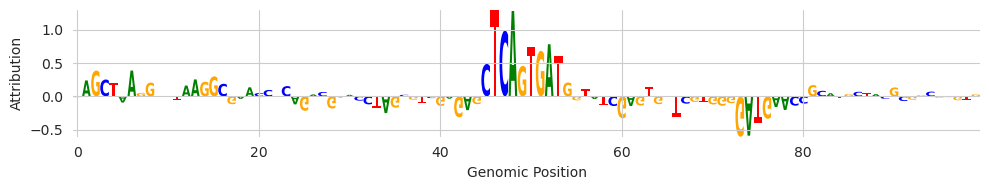

In [5]:
from matplotlib import pyplot as plt
import seaborn; seaborn.set_style('whitegrid')
from tangermeme.plot import plot_logo

plt.figure(figsize=(10, 2))
ax = plt.subplot(111)
plot_logo(X_attr[0, :, 950:1050, 301], ax=ax)

plt.xlabel("Genomic Position")
plt.ylabel("Attribution")

plt.tight_layout()
plt.show()

4it [00:00, 3998.38it/s]


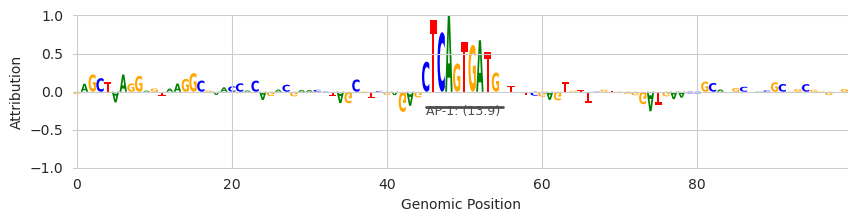

In [6]:
from tangermeme.utils import one_hot_encode
from tangermeme.tools.fimo import FIMO

motifs = {'AP-1': one_hot_encode("CTCAGTGATG").T}
annotations = FIMO(motifs).hits(X, threshold=1e-3, dim=1) 


plt.figure(figsize=(10, 2))
ax = plt.subplot(111)
plot_logo(X_attr[0, :, :, 267], ax=ax, start=950, end=1050, annotations=annotations[0])

plt.xlabel("Genomic Position")
plt.ylabel("Attribution")

#plt.tight_layout()
plt.show()